# LBM 1st code  LBM- 1-D, diffusion equation D1Q2

Text(0, 0.5, 'temperature')

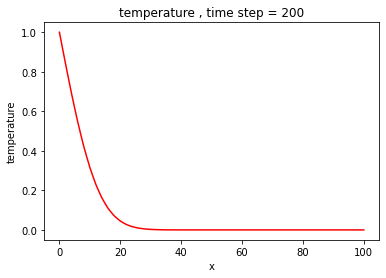

In [159]:
import numpy as np
import matplotlib.pyplot as plt
m = 101
rho = np.zeros(m); f1 = np.zeros(m) ;f2 = np.zeros(m) ; flux = np.zeros(m) ; 
x = np.arange(0,m,1)
alpha = 0.25
omega = 1/(alpha + 0.5)
twall = 1
nstep = 200
#collision
for k in range (nstep):
    #print(rho[0])
    f1 = (1-omega) * f1 + omega * 0.5*rho
    f2 = (1-omega) * f2 + omega * 0.5*rho
    #streaming
    f1 = np.roll(f1,1)  
    f2 = np.roll(f2,-1)
    f1[0] =   twall - f2[0]
    f1[m-1] = f1[m-2]
    f2[m-1] = f2[m-2]
    rho = f1+f2
#flux
flux = omega*(f1-f2)
plt.plot(x,rho,'r')
plt.title('temperature , time step = 200')
plt.xlabel('x')
plt.ylabel('temperature')

Text(0, 0.5, 'flux')

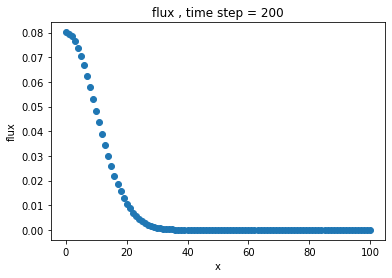

In [16]:
plt.plot(x,flux,'o')
plt.title('flux , time step = 200')
plt.xlabel('x')
plt.ylabel('flux')

# LBM 2nd code  LBM- 1-D, diffusion equation D1Q3

Text(0, 0.5, 'temperature')

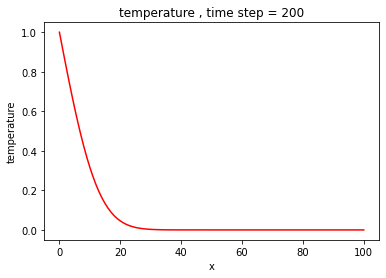

In [24]:
import numpy as np
import matplotlib.pyplot as plt
m = 101
rho = np.zeros(m); f0 = np.zeros(m) ; f1 = np.zeros(m) ;f2 = np.zeros(m) ; 
fluxq = np.zeros(m); 
flux = np.zeros(m) ; 
w0 = 4/6 ;w1 = 1/6; c2 = 1/3
w2 = w1
x = np.arange(0,m,1)
alpha = 0.25
omega = 1/(3*alpha + 0.5)
twall = 1
nstep = 200
f0 = w0*rho
f1 = w1*rho
f2 = w2*rho
#collision
for k in range (nstep):
    #print(rho[0])
    f0 = (1-omega) * f0 + omega * w0*rho 
    f1 = (1-omega) * f1 + omega * w1*rho 
    f2 = (1-omega) * f2 + omega * w1*rho 
    #streaming
    f1 = np.roll(f1,1)  
    f2 = np.roll(f2,-1)
    f1[0] =   twall - f2[0] - f0[0]
    f1[m-1] = f1[m-2]
    f2[m-1] = f2[m-2]
    f0[m-1] = f0[m-2]
    rho = f0+f1+f2
    #print(f1[0])
#flux
flux = omega*(f1-f2)/c2
for i in range(m-1):
    fluxq[i] = rho[i]-rho[i+1]
fluxq[m-1] = fluxq[m-2]
plt.plot(x,rho,'r')
plt.title('temperature , time step = 200')
plt.xlabel('x')
plt.ylabel('temperature')

Text(0, 0.5, 'flux')

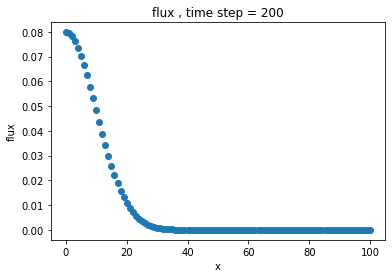

In [25]:
plt.plot(x,flux,'o')
plt.title('flux , time step = 200')
plt.xlabel('x')
plt.ylabel('flux')

# LBM 3rd code  LBM- 1-D, diffusion equation D1Q3 with flux boundary condition

Text(0, 0.5, 'temperature')

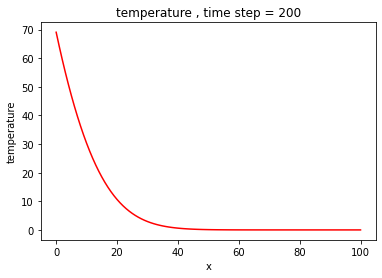

In [56]:
import numpy as np
import matplotlib.pyplot as plt
m = 101
rho = np.zeros(m); f0 = np.zeros(m) ; f1 = np.zeros(m) ;f2 = np.zeros(m) ; fluxq = np.zeros(m); 
flux = np.zeros(m) ; 
w0 = 4/6 ;w1 = 1/6; c2 = 1/3
w2 = w1
x = np.arange(0,m,1)

qf = 100 ; tk = 20
qsr = qs/rcp
alpha = 0.25
omega = 1/(3*alpha + 0.5)
twall = 1

nstep = 600
f0 = w0*rho
f1 = w1*rho
f2 = w2*rho
#collision
for k in range (nstep):
    #print(rho[0])
    f0 = (1-omega) * f0 + omega * w0*rho 
    f1 = (1-omega) * f1 + omega * w1*rho 
    f2 = (1-omega) * f2 + omega * w1*rho 

        #streaming
    f1 = np.roll(f1,1)  
    f2 = np.roll(f2,-1)
    

    
    f1[0] =   f2[0]+c2*qf/(tk*omega);
    f1[m-1] = f1[m-2]
    f2[m-1] = f2[m-2]
    f0[m-1] = f0[m-2]
    rho = f0+f1+f2
    #print(f1[0])
#flux
flux = omega*(f1-f2)/c2
for i in range(m-1):
    fluxq[i] = rho[i]-rho[i+1]
fluxq[m-1] = fluxq[m-2]
plt.plot(x,rho,'r')
plt.title('temperature , time step = 200')
plt.xlabel('x')
plt.ylabel('temperature')

Text(0, 0.5, 'flux')

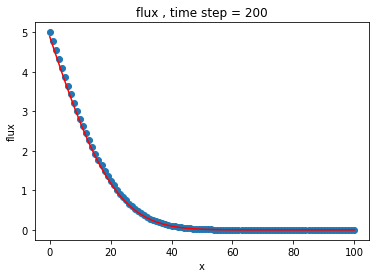

In [57]:
plt.plot(x,flux,'o')
plt.plot(x,fluxq,'r')
plt.title('flux , time step = 200')
plt.xlabel('x')
plt.ylabel('flux')

# LBM 4th code source term  LBM- 1-D, diffusion equation D1Q3 

Text(0, 0.5, 'temperature')

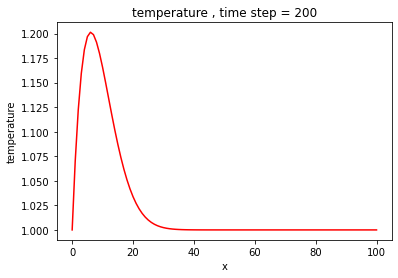

In [58]:
import numpy as np
import matplotlib.pyplot as plt
m = 101
rho = np.zeros(m); f0 = np.zeros(m) ; f1 = np.zeros(m) ;f2 = np.zeros(m)
w0 = 4/6
w1 = 1/6
c2 = 1/3
w2 = w1
fluxq = np.zeros(m); flux = np.zeros(m) ; 
x = np.arange(0,m,1)
rcp = 200
qs = 1
qsr = qs/rcp
alpha = 0.25
omega = 1/(3*alpha + 0.5)
twall = 1
tk = alpha * rcp
nstep = 200
f0 = w0*rho
f1 = w1*rho
f2 = w2*rho
#collision
for k in range (nstep):
    #print(rho[0])
    f0 = (1-omega) * f0 + omega * w0*rho + qsr * w0
    f1 = (1-omega) * f1 + omega * w1*rho + qsr * w1
    f2 = (1-omega) * f2 + omega * w1*rho + qsr * w1

        #streaming
    f1 = np.roll(f1,1)  
    f2 = np.roll(f2,-1)
    

    
    f1[0] = twall - f2[0] - f0[0] 
    f1[m-1] = f1[m-2]
    f2[m-1] = f2[m-2]
    f0[m-1] = f0[m-2]
    rho = f0+f1+f2
    #print(f1[0])
#flux
flux = omega*(f1-f2)/c2
for i in range(m-1):
    fluxq[i] = rho[i]-rho[i+1]
fluxq[m-1] = fluxq[m-2]
plt.plot(x,rho,'r')
plt.title('temperature , time step = 200')
plt.xlabel('x')
plt.ylabel('temperature')

Text(0, 0.5, 'flux')

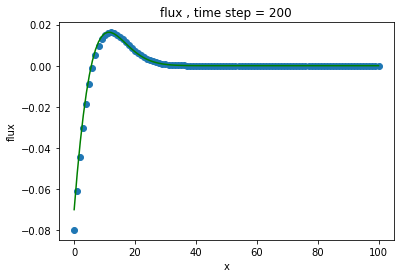

In [59]:
plt.plot(x,flux,'o')
plt.plot(x,fluxq,'g')
plt.title('flux , time step = 200')
plt.xlabel('x')
plt.ylabel('flux')

# LBM 5th code source term  LBM- 1-D, diffusion equation D1Q3 

Text(0, 0.5, 'temperature')

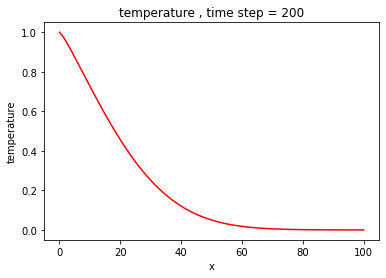

In [61]:
import numpy as np
import matplotlib.pyplot as plt
m = 101 
rho = np.zeros(m); f0 = np.zeros(m) ; f1 = np.zeros(m) ;f2 = np.zeros(m) ; fluxq = np.zeros(m); flux = np.zeros(m) ;
tk = np.zeros(m) ; dtkdx = np.zeros(m) ; cpr = np.zeros(m) ; alpha = np.zeros(m) ; omega  = np.zeros(m)
w0 = 4/6; w1 = 1/6
c2 = 1/3
w2 = w1
x = np.arange(0,m,1)
tk = 20 + 30/(2*x + 1)
alpha = tk/100
omega = 1/(3*alpha + 0.5)
twall = 1
nstep = 1500
f0 = w0*rho
f1 = w1*rho
f2 = w2*rho
#collision
for k in range (nstep):
    f0 = (1-omega) * f0 + omega * w0*rho 
    f1 = (1-omega) * f1 + omega * w1*rho
    f2 = (1-omega) * f2 + omega * w1*rho 
    #streaming
    f1 = np.roll(f1,1)  
    f2 = np.roll(f2,-1)
    
    f1[0] = twall - f2[0] - f0[0] 
    f1[m-1] = f1[m-2]
    f2[m-1] = f2[m-2]
    f0[m-1] = f0[m-2]
    rho = f0+f1+f2
#flux
flux = omega*(f1-f2)/c2
for i in range(m-1):
    flux[i] = tk[i]*(rho[i]-rho[i+1])
fluxq[m-1] = fluxq[m-2]
plt.plot(x,rho,'r')
plt.title('temperature , time step = 200')
plt.xlabel('x')
plt.ylabel('temperature')

Text(0, 0.5, 'flux')

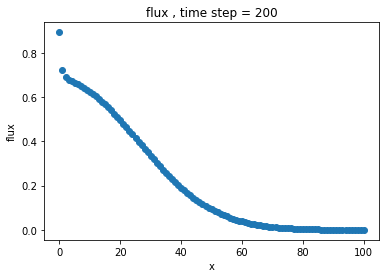

In [65]:
plt.plot(x,flux,'o')
#plt.plot(x,fluxq,'o')
plt.title('flux , time step = 200')
plt.xlabel('x')
plt.ylabel('flux')

# LBM 6th diffusion equation  LBM - 2-D, diffusion equation D2Q5a 

Text(0, 0.5, 'temperature')

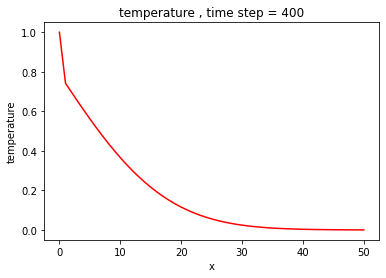

In [163]:
import numpy as np
import matplotlib.pyplot as plt
m = 51 ; n = 51
w0 = 2/6
w = 1/6
c2 = 1/3
f0=np.zeros((m,n)) ; f1 = np.zeros((m,n)) ; f2 = np.zeros((m,n)) ; f3 = np.zeros((m,n)) ;f4 = np.zeros((m,n))
rho = np.zeros((m,n)) ; fluxq = np.zeros(m) ; flux = np.zeros(m);
Tm = np.zeros(m); Z = np.zeros((n,m));
x = np.arange(0,m,1)
y = np.arange(0,1,0.02)
alpha = 0.25;
omega = 1/(3 * alpha + 0.5); twall=1 ; nstep=400;
f0 = w0*rho
f1 = w*rho
f2 = w*rho
f3 = w*rho
f4 = w*rho
#Collision:
for k in range(nstep):
    f0 = (1 - omega) * f0 + omega*w0*rho
    f1=(1 - omega)*f1 + omega*w*rho
    f2=(1 -omega)*f2+omega*w*rho
    f3=(1 -omega)*f3+omega*w*rho
    f4=(1 -omega)*f4+omega*w*rho
    #Streaming
    f1 = np.roll(f1,1,axis=1)  
    f2 = np.roll(f2,-1,axis=1)
    f3 = np.roll(f3,-1,axis=0)  
    f4 = np.roll(f4,1,axis=0)  
    #Boundary condition:
    for j in range(n):
        f1[0,j] = twall-f2[0,j]-f0[0,j]-f3[0,j]-f4[0,j]
        f3[m-1,j]=-f1[m-1,j]-f0[m-1,j]-f2[m-1,j]-f4[m-1,j]
    for i in range(m):
        f3[i,0]=f3[i,1]
        f4[i,n-1]=-f0[i,n-1]-f3[i,n-1]-f2[i,n-1]-f1[i,n-1]

    rho=f1+f2+f0+f3+f4
#rotating matrix for contour plotting
Z = rho.transpose()

for i in range(n):
    Tm[i] = rho[i,24]
      
plt.plot(x,Tm,'r')
plt.title('temperature , time step = 400')
plt.xlabel('x')
plt.ylabel('temperature')

wrong result came need to check once with x array and y array 

Text(0, 0.5, 'flux')

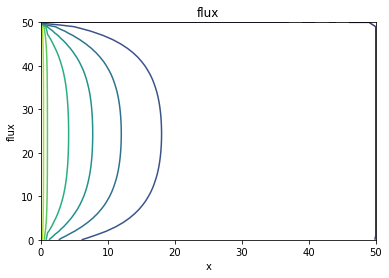

In [152]:
plt.contour(Z)
plt.title('flux')
plt.xlabel('x')
plt.ylabel('flux')

wrong result 

# LBM 7th diffusion equation  LBM - 2-D, diffusion equation D2Q9 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
m = 51 ; n = 51
c2 = 1/3
f0 = np.zeros((m,n)) ; f = np.zeros(((8,m,n))) ; feq = np.zeros(((8,m,n))) ; f0eq = np.zeros((m,n))
rho = np.zeros((m,n))  ; fluxq = np.zeros(m) ; flux = np.zeros(m); w = np.zeros(9)
Tm = np.zeros(m); Z = np.zeros((n,m)); 
x = np.arange(0,m,0.02)
y = np.arange(0,n,0.02)
w[0] = 4/9
for i in range(1,4):
    w[i] = 1/9
for i in range(4,9):
    w[i] = 1/36
alpha=0.25;
omega=1/(3*alpha+0.5); twall=1; nstep=400 
for k in range(nstep):
    f0eq = w[0]*rho
    f0 = (1-omega)*f0+omega*f0eq
    for j in range(n):
        for i in range(m):
            for k in range(8):
                feq[i,j,k] = w[k] * rho[i,j]
                f[i,j,k] = (1 - omega) * f[i,j,k]+omega*feq[i,j,k]
    #Streaming:
    f[:,:,1]=np.roll(f[:,:,1], 1 , axis=1)
    f[:,:,2]=np.roll(f[:,:,2], -1, axis=0 )
    f[:,:,3]=np.roll(f[:,:,3], -1, axis=1)
    f[:,:,4]=np.roll(f[:,:,4], 1, axis=0 )
    f[:,:,5]=np.roll(f[:,:,5], (1,-1),axis = (1,0))
    f[:,:,6]=np.roll(f[:,:,6], (-1,-1),axis = (1,0))
    f[:,:,7]=np.roll(f[:,:,7], (-1,1),axis = (1,0))
    f[:,:,8]=np.roll(f[:,:,8], (1,1),axis = (1,0))
#End of streaming
#Boundary condition:
#left boundary, 
    twall=1.0
    for j in range(n):
        f[1,j,1]=w[1]*twall+w[3]*twall-f[1,j,3]
        f[1,j,5]=w[5]*twall+w[7]*twall-f[1,j,7]
        f[1,j,8]=w[8]*twall+w[6]*twall-f[1,j,6]
#bottom boundary, adiabatic, bounce back
    for i in range(m):
        f[i,1,2]=f[i,2,2]
        f[i,1,5]=f[i,2,5]
        f[i,1,6]=f[i,2,6]

#Top boundary, 
    T=0
    for i in range(n):
        f[i,m,7]=-f[i,m,5]
        f[i,m,4]=-f[i,m,2]
        f[i,m,8]=-f[i,m,6]
    
#right hand boundary
    for j in range(m):
        f[n,j,3]=-f[n,j,1]
        f[n,j,7]=-f[n,j,5]
        f[n,j,6]=-f[n,j,8]
#End of boundary conditions
    for j in range(n):
        for i in range(m):
            sumk=0
            for k in range(9):
                sumk = sumk+f(i,j,k);
    rho[i,j]=f0[i,j]+sumk;
#rotating matrix for contour plotting
z = rho.transpose()
for i in range(n):
    Tm[i]=rho[i,(n-1)/2];


plt.plot(x,Tm)
xlabel('X')
ylabel('T')
#figure(2)
plt.contour(Z)
plt.title('Flux')
plt.xlabel('X')
plt.ylabel('Flux')

IndexError: index 8 is out of bounds for axis 0 with size 8

In [96]:
 w = [5 for i in range(4)]

In [99]:
w =  [7 for i in range(4,7)]

In [104]:
w

array([0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778, 0.02777778, 0.02777778])

In [105]:
4/9

0.4444444444444444

In [125]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [122]:
np.roll(x, 2)


array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])

In [123]:
np.roll(x, -2)

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [126]:
x2 = np.reshape(x, (3,3))

In [127]:
x2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [144]:
np.roll(x2, -1 ,axis = 1)

array([[1, 2, 0],
       [4, 5, 3],
       [7, 8, 6]])

In [130]:
x2[:,0]

array([0, 3, 6])

In [140]:
np.roll(x2, (1, -1), axis=(1, 0))

array([[5, 3, 4],
       [8, 6, 7],
       [2, 0, 1]])